## Logistic Regression

### Regression - predictive modelling technique.
 - estimates the relationship between the dependent(target) and independent variable(predictor)
 - Types of regression:
 1. Linear Regression 
 2. Logistic Regression 
 3. Polynomial Regression 
 

### Logistic Regression 
- produces results in **binary format** which is used to predict the outcome of categorical dependent variable.So the outcome should be **discrete(binary)/categorical**
- Possible outcomes:
1. Yes Or No
2. 0 OR 1 
3. True OR False
4. High OR Low

- Threshold value : indicates the probability of winning(1)or losing(0) in the sigmoid curve. 
      - If value is >than threshold = output is rounded off to 1
       - if value is < than threshold = output is rounded down to 0v

### Difference between linear and logistic regression 
1. Linear Regression 
     - y variable is continuous variables
     - solves linear regression problems
     - straight line graph.


2. Logistic Regression
      - y variable are categorical   variables.
      - solves classification problems.
      - S-Curve (Sigmoid Curve)

### Logistic Regression- Use Cases
1. weather predictions - whether it will rain or not
                     - snow or not.
2. Classification problems - whether an item believes in a particular group or not. Eg if it's a bird or not.
3. Determine illness -  identify if a patient is ill or not.
 

## logistic regression/Classification using scikitlearn 

In [2]:
#logistic regression 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



#load the data
data = pd.read_csv('data.csv')
print(data.head())

#build the model
logreg_model = LogisticRegression(C=1e5, fit_intercept=False, solver='liblinear')
"""
1. C - regularization parametric. Controls the strength of regularization to prevent overfitting.
     - C is the inverse of the regularization strength (lambda in regularization terms).
      -  A large value of C (like 1e12) means very weak regularization, allowing the model more freedom to fit the data without penalizing large coefficients. 
      - Conversely, a smaller value of C would imply stronger regularization, which could help prevent overfitting by constraining the model coefficients.
  - Regularization is a technique used to prevent overfitting.We are doing inverse because the smaller the value of C, the higher the regularization strength.
  - 
2.fit_intercept is set to False. It specifies whether a constant (a.k.a. bias or intercept) should be added to the decision function. If false the model 
assumes that the data is already centered at the origin.
3. solver - specifies the algorithm to use in the optimization problem. Optimization problem is to minimize the cost function.
          -liblinear is used for small datasets. 
          - Other algorithms include newton-cg, sag, saga, lbfgs.
            - lbfgs is used for large datasets.
            - sag and saga are faster for large datasets.
            - newton-cg is used for multiclass problems.Mulitclass problems are problems with more than two classes.
            
"""

#split the data
X = data[['age', 'interest']]
y = data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#train the model
logreg_model.fit(X_train, y_train)

#make predictions
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

#evaluate the model
print('Training accuracy: ', logreg_model.score(X_train, y_train))
print('Testing accuracy: ', logreg_model.score(X_test, y_test))

#to get the coefficients of the model
logreg_model.coef_

#to get the intercept of the mode
logreg_model.intercept_




 

SyntaxError: EOF while scanning triple-quoted string literal (1211594486.py, line 49)

## logistic regression using statsmodels.api


In [ ]:
#logistic regression using statsmodels.api 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#load the data
data = pd.read_csv('data.csv')

#split the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3, random_state= 0)
#build the model
logreg_model = sm.Logit(X_train,y_train).fit()

#print the summary 
print(logreg_model.summary())

#output of the summary 
"""
                            Logit Regression Results
==============================================================================
Dep. Variable:                success   No. Observations:                  700
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Nov 2020   Pseudo R-squ.:                  0.9142
Time:                        13:02:03   Log-Likelihood:                -46.290
converged:                       True   LL-Null:                       -529.00
Covariance Type:            nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0005      0.008      0.067      0.947      -0.015       0.016
interest       0.4984      0.086      5.782      0.000       0.329       0.668
==============================================================================

Dep Variable: The dependent variable in the model
Model: the type of the model- Logisitic regression
Method: The method used to fit the model. MLE stands for Maximum Likelihood Estimation
No of Observations : The number of data points used in the model
DF Residuals : Number of observations - number of predictions
DF Model: Number of predictors in the model

Fit Statistics:
Pseudo R-Squared: A measure of how well the model fits the data.The closer to 1 the better the model
age and interest: These are the predictors of the model 
age is not statistically significant as the p-value is greater than 0.05
interest is statistically significant as the p-value is less than 0.05
Thus the coefficient of interest means that for every unit increase in interest, the odds of success increase by 0.4984. The higher the the coefficient the higher the odds of success/ the event
happening.


"""

## MLE - Maximum Likelihood Estimation
- Method used to estimate the parameters(coefficients) of a logistic regression.
- MLE finds the values of the coefficients that make the observed data most probable under the model.
- The idea behind MLE is to find the parameter values that maximize the likelihood function, which represents the probability of the observed data given a set of parameters.

* Likelihood Function: In logistic regression, the likelihood function is the product of probabilities of the observed outcomes, given the predictor variables and the model's coefficients.

* Log-Likelihood: Because the likelihood function involves multiplying many probabilities, which can result in very small numbers, it's common to work with the log of the likelihood function. The log-likelihood is the sum of the logarithms of the individual probabilities. Maximizing the log-likelihood is equivalent to maximizing the likelihood.
- The goal is to find the values of the coefficients β0,β1,…,βnβ0​,β1​,…,βn​ that maximize the log-likelihood function. This is typically done using numerical optimization techniques because the log-likelihood function is not linear and doesn't have a closed-form solution.
   1. Gradient Descent - minimizing the cost function 
   2. Gradient Ascent - maximizing the log-likelihood  function.



## **Cost Function** - measures how well a model's prediction matches the real data. Types of cost function 
 1. RSS/SSR - Residual sum of Squares - it quantifies the error between the actual and the predicted values.
   - RSS - this is basically the error(y-ypred), then square each error and sum the squared errors.
   - Minimizing RSS: Helps find the best-fit model parameters in linear regression. The slope and intercept.

     - The goal in linear regression is to find the intercept and slope(model parameter) that minimizes the cost function
     - Minimizing the RSS ensures that the overall prediction error is minimized, leading to the best-fitting line through the data points. Thus even why 
     OLS (Ordinary Least Squares is used)- Least Squares refer to minimizing the sum of squared residuals

     - Sensitive to outliers. As the squaring of outliers greatly increases the RSS
     - USED WHEN: -  you need a straightforward measure of total squared error, often in theoretical contexts or when comparing models with consistent data points.
2. MSE - Mean Squared Error.
        -  Used in most regression problems, particularly when you need a differentiable cost function for optimization, and when average error per data point is of interest.
3. MAE - Mean Absolute Error.- It is less sensitive to outliers compared to MSE and RSS.it is the absolute value of the errors |y - y_pred|
                    - Used when you want to preserve the units. 
                    - Used when you want a cost function that’s robust to outliers, and you prefer interpretability with the same units as the data, or when dealing with problems where the median error is more relevant.

In [ ]:
#use RSS to create a cost function
def rss(m,X= X_train, y=y_train):
    y_pred = m * X #m is the coefficient of the model. By coefficient of the model we mean the slope of the model
    residual_sum_of_squares = np.sum((y_pred - y) ** 2)

    return residual_sum_of_squares

## Gradient Descent - Optimization algorithm. Used to minimize the Cost Function  RSS, MSE, MAE in Linear Regression
- We use gradient descent instead of Gradient Ascent because in descent the minimum value is 0 while for ascent the maximum value is infinity thus getting to 0 is easier than getting to infinity.
- In order to find the best model parameters.
- How to conduct Gradient Descent:  - 
    1. Start with an initial guess for the parameters (e.g., m and b in linear regression).
    2. Calculate the gradient (partial derivatives) of the cost function with respect to each parameter.
    3. Adjust the parameters in the direction that reduces the cost function:
       θnew=θold−α⋅∂J/∂θ
      
   Where:

    θ represents the parameters (e.g., weights).
    α is the learning rate (step size).
    ∂J/∂θ is the gradient of the cost function

    4. Repeat the gradient computation and parameter update steps until the cost function converges (i.e., changes very little between iterations) or a maximum number of iterations is reached.
    5. When the gradient is near zero, the algorithm has found a local minimum, and the parameters are optimized.
       

In [ ]:
#calculating the cost function and gradient descent to minimize the cost function
#1. Set the initial parameters
m = 1
#step size/learning rate - refers to how much the parameter will be updated/adjusted in each iteration
alpha = 0.5 # This the rate at which the model learns. The higher the learning rate the faster the model learns but the lower the learning rate the slower the model learns
#number of iterations - the number of times the model will cycle through the data
iterations = 1000

#initialize the iteration counter
iteration = 0 

#set a precision value to determine when to stop the model. Precision is how close the model is to the true value
precision = 0.000001



#calculate the gradient descent
while iteration < iterations:
    #calculate the gradient of the cost function
    gradient = np.sum(X_train * (m*X_train - y_train))#this is the derivative of the cost function
    #update the parameters
    m = m - alpha * gradient
    #calculate the cost function
    cost = rss(m)
    #increment the iteration counter
    iteration += 1
    #print the cost function
    print('Iteration: ', iteration, 'Cost: ', cost)
    #check if the cost function has converged
    

#output of the cost function




## Gradient descent in Logistic regression 
- in logistic regression the cost function is based on MLE - Maximum likelihood Estimation. Maximizing the likelihood of observing the given data under a model.
                
- Cost function used here is log- loss

In [ ]:
# gradient descent in logistic regression
 #1. start with initial guesses of the coefficients
beta_1 = 1 # this is the slope of the model. from the equation y = beta_0 + beta_1 * x
beta_0 = 1 # this is the intercept of the model
alpha = 0.5 # this is the learning rate of the model
iterations = 1000 # this is the number of iterations of the model
precision = 0.000001 # this is the precision of the model

#previous cost function
previous_cost = float('inf') #setting the previous cost function to infinity. So that the model can start with a high cost function

#2. set the sigmoid function. The sigmoid function is used to convert the linear model to a probability between 0 and 1. This is because the linear model can have any value between negative and positive infinity and 
#we are dealing with logistic regression.
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#3. calculate the gradient descent
iteration = 0
while iteration < iterations:
    #1.calculate the linear model
    z = beta_0 + beta_1 * X_train
    #2. calculate the predicted values
    y_pred = sigmoid(z)
    #3. calculate the gradient of the cost function
    gradient_beta_0 = np.sum(y_pred - y_train)
    gradient_beta_1 = np.sum(X_train * (y_pred - y_train))

    #4. update the parameters
    beta_0 = beta_0 - alpha * gradient_beta_0
    beta_1 = beta_1 - alpha * gradient_beta_1

    #5. calculate the cost function. The cost function is the log likelihood function. The log likelihood function is used to measure the probability of the model given the data. if the probability is high then the model is good
    cost = -np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))

     # Check for convergence
     """Since previous_cost is set to infinity, the condition if abs(previous_cost - cost) < precision will not trigger the break on the first iteration because the difference will be very large (inf minus any finite number is still inf).

     Subsequent Iterations: After the first iteration, previous_cost is updated to the cost from the previous iteration, and the difference between previous_cost and the current cost is compared. 
    If the difference is smaller than the defined precision, it indicates that the algorithm is converging, and the loop can be stopped.
     
     """
    if abs(previous_cost - cost) < precision: # If the difference between the previous cost and the current cost is less than the precision, break
        break
    previous_cost = cost # if the difference is not less than the precision, update the previous cost to the current cost
    iteration += 1




    

### classification metrics
- Gives data such as
1. True Positive value 
2. False Positive value - value that is not supposed to be a positive. A negative value predicted as positive.
3. True Negative
4. False Negative - value that is not supposed to be a negative. A positive value predicted as negative.

- In a confusion matrix the diagonals represent the true positives. This is because the row and column indexes are the same.


In [7]:
#use sklearn to perform confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

actual_values =    [1,0,1,1,0,1,0,0,1,0]
predicted_values = [1,0,1,0,0,1,1,0,1,0]

print(confusion_matrix(actual_values, predicted_values))


#doing confusion matrix manually using a function 
def conf_matrix(y_true,y_pred,num_classes=None):
    #count the number of classes in the confusion matrix
    if num_classes is None:
        num_classes = len(np.unique(y_true))  #to get the number of unique classes in the true values
        #or num_classes = max(max(y_true), max(y_pred)) + 1 #get the max of the y_true and y_pred, get the max of both then add 1 to get the number of classes

    #initialize the confusion matrix
    confusion_matrix = np.zeros((num_classes, num_classes))#create a matrix of zeroes with num_classes as the rows and columns

    #loop through the true and predicted values
    for true,pred in zip(y_true, y_pred):
        #increment the confusion matrix
        confusion_matrix[true][pred] += 1 #confusion_matrix[true][pred] is the cell in the matrix that is being incremented. 

    #return the confusion matrix in form of a dictionary as TP, FP, TN, FN
    return {
        'TP': confusion_matrix[0][0],
        'FP': confusion_matrix[1][0],
        'TN': confusion_matrix[1][1],
        'FN': confusion_matrix[0][1]    }
y_test = [1,0,1,1,0,1,0,0,1,0]
y_pred = [1,0,1,0,0,1,1,0,1,0]

conf_matrix(y_test, y_pred)

[[4 1]
 [1 4]]


{'TP': 4.0, 'FP': 1.0, 'TN': 4.0, 'FN': 1.0}

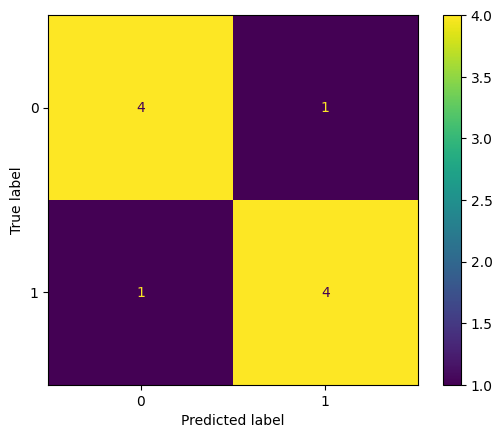

In [8]:
#using confusion matrix display to display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

## Evaluation Metrics used in Classification 
1. Precision - measures the **ACCURACY** of positive predictions.
    - precision = true positive / (true positive + false positive)
          - eg precision allows us to answer the questions:
    - out of all the times the model predicted the person has the disease, how many times did the person in question actually have the disease.
    - A model can have a high precision score but it doesn't mean it's a high performing model because:
        - With a total of 5000 it can predict that 4000 have the disease of which 3000are correct predictions but  give a precision score of 89% while another model can predict 5 to have the disease out of the 5000 of which all the 5 are correct predictions and give a 100% precision 
2. Recall - measures **COMPLETENESS** of the positive predictions. What percentage of classes we were interested in are actually captured.
         recall = true positive / (true positive + false negative)
    - Out of all the patients we saw that actually had the disease, what percentage of them did our model correctly identify as having the disease?"
    - Precision and recall have an inverse relationship. As precision goes up recall goes down and vice versa.


## Describing the performance of the model
1. Accuracy - out of all the predictions(whether true positives and true negatives), what percentage is correct.
    -  Accuracy = (true positive + true negative) /total observations
2. F1 score/ Harmonic mean of both Precision and Recall - if both the precision and recall are high even the F1 score will be high. If the F1 score is 
   high then your model is doing well around.
   - F1 score = 2( (precision * recall)/ (precision + recall) )





- using sklearn.metrics import classification_report() it will give you the precision, recall, F1 score and support(number of occurrences of each label in y_true) for the results of a model.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

### ROC AND AUC
- ROC : Receiver Operating Characteristic Curves- ROC graphs allow us to determine optimal precision-recall tradeoff balances specific to the problem you are looking to solve.
- AUC : Area under the curve - are an alternative to confusion matrices


### ROC Curves
- illustrates the true positive rate against the false positive rate.
- TPR = RECALL = TP/ (TP + FN)
- FPR = FP/ (FP + TN)

- When training a classifier, the best performing models will have an ROC curve that hugs the upper left corner of the graph. 
- A classifier with 50-50 accuracy is deemed 'worthless'; this is no better than random guessing, as in the case of a coin flip( LINEAR LINE)
- Models with poor ROC might have large overlaps in the probability estimates for the two classes. This would indicate that the algorithm performed poorly and had difficulty separating the two classes from each other.
- 



- The ROC curve is plotted with the False Positive Rate (FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis. The curve shows the trade-off between sensitivity (true positive rate) and specificity (1 - false positive rate) across different thresholds.

### AUC
-  An AUC of 1 being a perfect classifier, and an AUC of 0.5 being that which has a precision of 50%.

- AUC is the area under the ROC curve. It quantifies the overall ability of the model to discriminate between the positive and negative classes. The AUC value ranges from 0 to 1, where:

    AUC = 1: Perfect classifier
    AUC = 0.5: Classifier with no discrimination ability (equivalent to random guessing)
    AUC < 0.5: Worse than random guessing (rarely seen in practice, typically due to model or data issues)

- While normalizing data is not strictly necessary for logistic regression, it is a good practice, especially when features have different scales or units. MinMax scaling is one of the ways to normalize data, but you could also use standardization or other methods depending on your needs.

In [1]:
#graph the ROC curve
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y) # stratify=y ensures that both the y_train and y_test have the same proportion

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# Data preview
print("")
df.head()

# Get the predicted probabilities - this is the probability of the model predicting 1 from X_test
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False Positive Rate, True Positive Rate, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Area Under the Curve
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
lw = 2 # Line width
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--') # Chance line
plt.xlim([0.0, 1.0]) # x-axis limits
plt.ylim([0.0, 1.05]) # y-axis limits
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right") #legend is the box that shows the labels of the graph
plt.show()


KeyboardInterrupt



- In this lesson, we investigated another evaluation metric for classification algorithms (including logistic regression). Namely, the Receiver Operating Characteristic curve (ROC) which graphs the False Positive Rate against the True Positive Rate. The overall accuracy of a classifier can thus be quantified by the AUC, the Area Under the Curve. Perfect classifiers would have an AUC score of 1.0 while an AUC of 0.5 is deemed trivial or worthless. Next, you're going to get more practice graphing the ROC and AUC curves and making interpretations based on them.

### class imbalance
- 1. Biased Predictions :  For example, if 95% of the data belongs to Class A and 5% belongs to Class B, a model could achieve 95% accuracy simply by predicting Class A all the time, completely ignoring Class B.

2. oor Generalization: The model tends to learn patterns only for the majority class and fails to generalize well for the minority class. This means that the model's performance is not balanced across all classes.

3. Misleading Metrics: Accuracy can be a misleading metric in imbalanced datasets, as it does not account for the number of false negatives or false positives. Metrics like precision, recall, and the F1-score provide a better picture in such cases.

### TO ADDRESS class imbalance 
1. Use class weights in logistic Regression
- This involves assigning a higher weight to the minority class, effectively telling the model that misclassifying the minority class is more costly than misclassifying the majority class.

- how class weights work? 
  - Balanced Weights: The weight for each class can be inversely proportional to its frequency in the dataset. This can be done automatically in scikit-learn by setting class_weight='balanced'. This approach adjusts the weights inversely proportional to the class frequencies in the input data.

   - Manual Weights: Alternatively, you can specify the class weights manually, giving more weight to the minority class based on domain knowledge or specific business requirements.

In [2]:
#balancing class weights to reduce class imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

# 
import numpy as np
import pandas as pd

# Create a dataset with class imbalance
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model with no class weights
logreg = LogisticRegression( random_state=42)
model_log = logreg.fit(X_train, y_train)

# Predict with no class weights
y_pred_no_weights = model_log.predict(X_test)

print("Classification Report without Class Weights:")
print(classification_report(y_test, y_pred_no_weights))

# Train a model with class weights
logreg_balanced = LogisticRegression( class_weight='balanced', random_state=42)

model_balanced = logreg_balanced.fit(X_train, y_train)

# Predict with class weights
y_pred_balanced = model_balanced.predict(X_test)

print("Classification Report with Class Weights:")
print(classification_report(y_test, y_pred_balanced))



Classification Report without Class Weights:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       226
           1       0.95      0.88      0.91        24

    accuracy                           0.98       250
   macro avg       0.97      0.94      0.95       250
weighted avg       0.98      0.98      0.98       250

Classification Report with Class Weights:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       226
           1       0.67      0.92      0.77        24

    accuracy                           0.95       250
   macro avg       0.83      0.93      0.87       250
weighted avg       0.96      0.95      0.95       250



### Interpreting Results
  1. Without Class Weights:
        You might notice high accuracy but poor recall (sensitivity) for the minority class (Class 1). This means that the model is not identifying many true positives for Class 1 because it is biased toward predicting the majority class (Class 0).
  2. With Balanced Class Weights:
        The model is more likely to correctly identify instances of the minority class (Class 1), resulting in better recall for Class 1. The precision for Class 0 might decrease slightly because the model is now penalized more for misclassifying the minority class, leading to a better balance between the classes.



- This method is particularly useful when the cost of missing true positives (false negatives) is high, as in medical diagnoses or fraud detection.

2. Address class imbalance by 
- **Oversampling and Undersampling**: oversampling the minority class or undersampling the majority class can help by producing a synthetic dataset that the learning algorithm is trained on
- Undersampling can only be used when you have a truly massive dataset and can afford to lose data points. However, even with very large datasets, you are losing potentially useful data. Oversampling can run into the issue of overfitting to certain characteristics of certain data points because there will be exact replicas of data points.

3. More advanced technique for addressing class imbalance is :
- **SMOTE - Synthetic Minority Oversampling**: rather then simply oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases. 

In [ ]:
from imblearn.over_sampling import SMOTE

# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state= 42, sampling_strategy=0.28)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

"""
oUTPUT
Original class distribution: 

0    99773
1      227
Name: is_attributed, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1    74841
0    74841
Name: is_attributed, dtype: int64

"""

- Check for class imbalance while previewing the data
column.value_counts()

### Decision Trees

In [ ]:
#decision tree- a decision tree is a tree like model that makes decisions based on the features of the data. It is a supervised learning algorithm that can be used for both classification and regression problems.
#decision trees are easy to understand and interpret. They are also non-parametric models which means they do not make any assumptions about the data. They can handle both numerical and categorical data.
#decision trees are prone to overfitting. This is because they can keep splitting the data until each leaf node has only one data point. This can be prevented by pruning the tree or using ensemble methods like random forests.
#decision trees are also sensitive to the data. A small change in the data can lead to a completely different tree. This can be prevented by using ensemble methods like random forests.    
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

#Normalize the data
X_train = X_train.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)
X_test = X_test.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Fit a model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict
y_hat_test = clf.predict(X_test)

# Data preview
print("")
df.head()
